In [1]:
#import libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

plt.style.use('ggplot')


In [4]:
#Load the diabetes dataset

my_data= pd.read_csv('/content/diabetes.csv')

my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

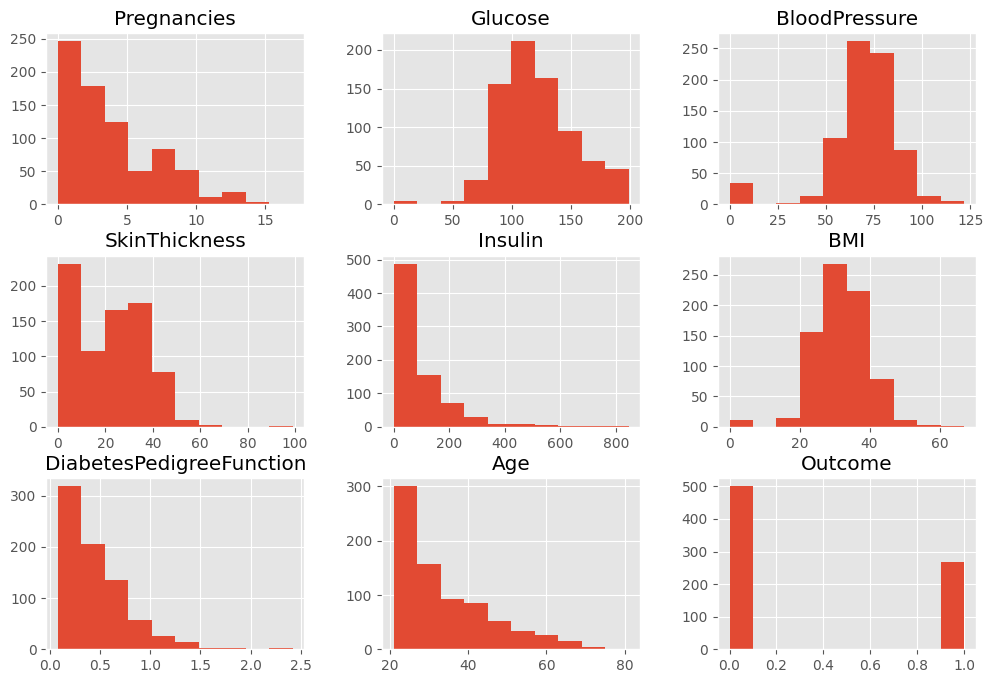

In [5]:
#hitogram
my_data.hist(figsize=(12,8))

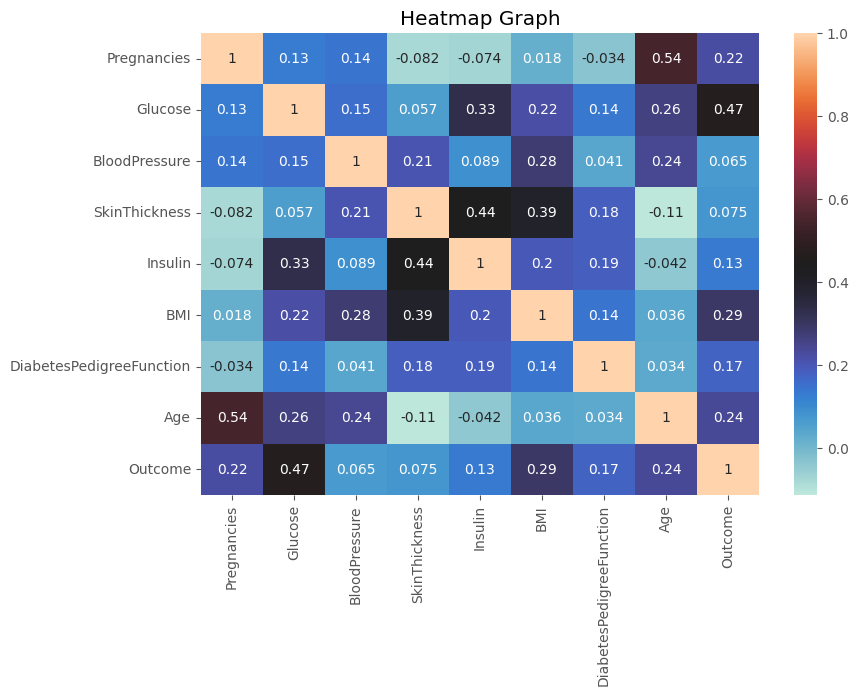

In [6]:
# potential relationship between different attributes
plt.figure(figsize=(9,6))
sns.heatmap(my_data.corr(), annot=True, cmap='icefire').set_title('Heatmap Graph')
plt.show()

In [7]:
#Create a numpy arrays for features and target class

X_val = my_data.drop('Outcome',axis=1).values

y_val = my_data['Outcome'].values

In [24]:
#import train_test_split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_val,y_val,test_size=0.2,random_state=92, stratify=y_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Implement KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Let's start with k=5
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [27]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7402597402597403


In [28]:
# Prediction on new data
new_data = np.array([[2, 111, 80, 30, 0, 25, 0.25, 35]])

# Preprocess the new data (scale it)
new_data_scaled = scaler.transform(new_data)

In [29]:
# Make prediction
prediction = knn.predict(new_data_scaled)

# Output the prediction
if prediction[0] == 0:
    print("No diabetes")
else:
    print("Diabetes detected")

No diabetes
